Importing Libraries

In [1]:
#Required Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from scipy.stats import skew

In [2]:
#Reading Raw Data
df = pd.read_csv('/content/dataset.csv',index_col=[0])
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [3]:
#Dropping columns that are not useful for analysis
df = df.drop(df.columns[[6]], axis = 1)
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,2013-05-07


In [4]:
column_headers = list(df.columns)
print(column_headers)

['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name', 'date']


In [5]:
#Checking for Missing Values
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
crypto_name    0
date           0
dtype: int64

In [6]:
#Removing Exponential Components
pd.options.display.float_format = '{:,.4f}'.format
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07


In [7]:
df.dtypes

open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
crypto_name     object
date            object
dtype: object

In [8]:
#Fixing Data Type for date column
df["new_date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month

In [9]:
df = df.drop(df.columns[[7]], axis = 1)
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name            object
new_date       datetime64[ns]
year                    int64
month                   int64
dtype: object

In [10]:
#fixing data type for crypto_name column
df["crypto_name"] = df["crypto_name"].astype("category")
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name          category
new_date       datetime64[ns]
year                    int64
month                   int64
dtype: object

In [11]:
#Cleansed Data
df.head(10)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05,2013,5
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06,2013,5
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5
5,3.3709,3.4067,2.9398,3.3327,0.0000,"58,051,265.0352",Litecoin,2013-05-07,2013,5
6,3.2836,3.4911,3.2836,3.4092,0.0000,"59,508,216.0152",Litecoin,2013-05-08,2013,5
7,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5
8,3.3994,3.4417,3.2949,3.4162,0.0000,"59,755,569.0920",Litecoin,2013-05-09,2013,5
9,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5


In [12]:
df.tail(10)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month
72936,4.9056,5.0298,4.8136,5.0219,"27,845,089.0700","1,350,318,838.1100",Internet Computer,2022-10-23,2022,10
72937,8.8481,9.1213,8.3245,8.7269,"50,186,982.8800","1,338,344,167.4800",Huobi Token,2022-10-23,2022,10
72938,0.0597,0.0608,0.0586,0.0606,"21,723,721.8100","1,391,261,076.0000",Hedera,2022-10-23,2022,10
72939,22.5802,23.1849,22.4218,23.1476,"34,691,702.7400","3,084,675,569.4900",FTX Token,2022-10-23,2022,10
72940,1.3840,1.4060,1.3543,1.4045,"4,750,240.3800","1,715,465,953.7600",Toncoin,2022-10-23,2022,10
72941,0.0226,0.0230,0.0222,0.0228,"40,401,338.0800","1,652,957,186.6300",VeChain,2022-10-23,2022,10
72942,1.4682,1.5305,1.4354,1.5179,"28,443,510.4300","1,572,824,923.0800",Flow,2022-10-23,2022,10
72943,4.9504,5.1486,4.9453,5.1172,"106,949,683.6200","1,559,551,358.4900",Filecoin,2022-10-23,2022,10
72944,0.0002,0.0002,0.0002,0.0002,"214,326,817.6300","1,576,291,167.4500",Terra Classic,2022-10-23,2022,10
72945,0.4655,0.4710,0.4534,0.4690,"950,974,304.9800","23,398,675,901.6100",XRP,2022-10-23,2022,10


# Pre-processing


# Outlier Analysis
# 1. Box Plot

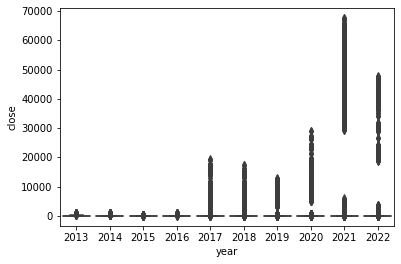

In [13]:
ax = sns.boxplot(x="year", y="close", data=df)

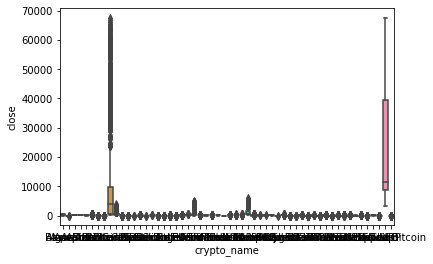

In [14]:
ax = sns.boxplot(x="crypto_name", y="close", data=df)


# 2. IQR

In [15]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn,[40,60])
  IQR=Q3-Q1
  print("IQR:  ",IQR)
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [16]:
lowerbound,upperbound = outlier_treatment(df['close'])

IQR:   3.2101698472999995


In [17]:
#filtering dataset according to IQR
filtered_data = df[(df.close < lowerbound) | (df.close > upperbound)]
#Although dataframe has huge number of outliers, not all of them can be removed.
#This is because the outliers may have been caused due to actual events.
#We also need to consider the fact that the cryptocurrency market is very volatile and has huge variations.

## Data Exploration

In [18]:
#Taking Mean of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].mean()

open                   870.1945
high                   896.4124
low                    844.0606
close                  871.2949
volume       2,207,607,310.5056
marketCap   14,749,221,288.6943
dtype: float64

In [19]:
#Taking Median of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].median()

open                    1.6307
high                    1.7175
low                     1.5415
close                   1.6402
volume        109,875,645.9553
marketCap   1,268,539,252.5723
dtype: float64

In [20]:
#Taking Mode of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].mode()

,open,high,low,close,volume,marketCap
0,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000


In [21]:
#Standard Deviation
np.std(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

open                 5,231.6186
high                 5,398.5756
low                  5,079.3546
close                5,235.4723
volume       9,617,818,979.5179
marketCap   75,011,077,205.6859
dtype: float64

In [22]:
#Variance
np.var(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

open                           27,369,833.2832
high                           29,144,618.8045
low                            25,799,842.8588
close                          27,410,169.6986
volume         92,502,441,922,775,285,760.0000
marketCap   5,626,661,703,557,363,793,920.0000
dtype: float64

In [23]:
#Kurtosis
from scipy.stats import kurtosis

print("Pearson Kurtosis: ", kurtosis(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], fisher=False))
print("Fisher Kurtosis: ", kurtosis(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], fisher=True))

Pearson Kurtosis:  [ 80.14357608  88.72655568  80.44716118  79.99870494 139.18110365
 122.47722167]
Fisher Kurtosis:  [ 77.14357608  85.72655568  77.44716118  76.99870494 136.18110365
 119.47722167]


In [24]:
#Checking skewness of the data
skew(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

#When the skew value is greater than 0 means that the data is left skewed 

array([ 8.45653529,  8.64823371,  8.46800148,  8.44885284,  9.49944543,
       10.18308072])

In [25]:
#Log transformation
#log(x+1) used here to handle skewness.
df['log_open'] = np.log10(df['open']+1)
df['log_high'] = np.log10(df['high']+1)
df['log_low'] = np.log10(df['low']+1)
df['log_close'] = np.log10(df['close']+1)
df['log_volume'] = np.log10(df['volume']+1)
df['log_marketCap'] = np.log10(df['marketCap']+1)

In [26]:
skew(df[['log_open', 'log_high', 'log_low', 'log_close', 'log_volume', 'log_marketCap']], axis = 0)
#Now the data seems to be nornmally distributed.

array([ 1.43100849,  1.4160231 ,  1.44660305,  1.43035073, -1.38125942,
       -3.03989126])

In [27]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05,2013,5,0.6525,0.6714,0.6381,0.6619,0.0000,7.7945
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06,2013,5,0.6622,0.6795,0.6145,0.6406,0.0000,7.7679
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936


In [28]:
df.tail()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
72941,0.0226,0.0230,0.0222,0.0228,"40,401,338.0800","1,652,957,186.6300",VeChain,2022-10-23,2022,10,0.0097,0.0099,0.0095,0.0098,7.6064,9.2183
72942,1.4682,1.5305,1.4354,1.5179,"28,443,510.4300","1,572,824,923.0800",Flow,2022-10-23,2022,10,0.3924,0.4032,0.3866,0.4010,7.4540,9.1967
72943,4.9504,5.1486,4.9453,5.1172,"106,949,683.6200","1,559,551,358.4900",Filecoin,2022-10-23,2022,10,0.7745,0.7888,0.7742,0.7866,8.0292,9.1930
72944,0.0002,0.0002,0.0002,0.0002,"214,326,817.6300","1,576,291,167.4500",Terra Classic,2022-10-23,2022,10,0.0001,0.0001,0.0001,0.0001,8.3311,9.1976
72945,0.4655,0.4710,0.4534,0.4690,"950,974,304.9800","23,398,675,901.6100",XRP,2022-10-23,2022,10,0.1660,0.1676,0.1624,0.1670,8.9782,10.3692


In [29]:
new_df = df.loc[df['crypto_name'] == 'Bitcoin']
new_df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936
7,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5,2.0438,2.0674,2.0438,2.0591,0.0000,9.1018
9,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5,2.0577,2.0587,2.0424,2.0556,0.0000,9.0985


In [30]:
new_df.head(20)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936
7,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5,2.0438,2.0674,2.0438,2.0591,0.0000,9.1018
9,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5,2.0577,2.0587,2.0424,2.0556,0.0000,9.0985
10,112.7990,122.0000,111.5510,117.2000,0.0000,"1,305,479,080.0000",Bitcoin,2013-05-10,2013,5,2.0561,2.0899,2.0513,2.0726,0.0000,9.1158
12,117.7000,118.6790,113.0100,115.2430,0.0000,"1,284,207,489.4200",Bitcoin,2013-05-11,2013,5,2.0745,2.0780,2.0569,2.0654,0.0000,9.1086
15,115.6400,117.4490,113.4350,115.0000,0.0000,"1,281,982,625.0000",Bitcoin,2013-05-12,2013,5,2.0668,2.0735,2.0586,2.0645,0.0000,9.1079
17,114.8200,118.6990,114.5000,117.9800,0.0000,"1,315,710,010.5000",Bitcoin,2013-05-13,2013,5,2.0638,2.0781,2.0626,2.0755,0.0000,9.1192
18,117.9800,119.8000,110.2500,111.5000,0.0000,"1,243,874,487.5000",Bitcoin,2013-05-14,2013,5,2.0755,2.0821,2.0463,2.0512,0.0000,9.0948


In [31]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
1,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
2,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936
3,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5,2.0438,2.0674,2.0438,2.0591,0.0000,9.1018
4,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5,2.0577,2.0587,2.0424,2.0556,0.0000,9.0985


In [32]:
new_df.tail(50)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
3198,"30,273.6542","32,596.3078","29,944.8027","31,022.9054","59,811,038,817.2700","590,565,398,299.3600",Bitcoin,2022-05-10,2022,5,4.4811,4.5132,4.4763,4.4917,10.7768,11.7713
3199,"31,016.1828","32,013.4015","28,170.4131","28,936.3550","70,388,855,817.9300","550,870,071,633.8000",Bitcoin,2022-05-11,2022,5,4.4916,4.5053,4.4498,4.4615,10.8475,11.7410
3200,"30,098.5866","31,308.1914","29,527.7404","31,305.1126","25,835,372,064.6100","596,074,575,228.3300",Bitcoin,2022-05-15,2022,5,4.4786,4.4957,4.4702,4.4956,10.4122,11.7753
3201,"29,862.4082","30,694.4910","29,570.3019","30,425.8573","29,101,473,475.4300","579,391,415,566.4200",Bitcoin,2022-05-17,2022,5,4.4751,4.4871,4.4709,4.4833,10.4639,11.7630
3202,"29,432.4724","30,425.8605","29,275.1828","30,323.7219","21,631,532,269.6700","577,568,895,835.7200",Bitcoin,2022-05-22,2022,5,4.4688,4.4833,4.4665,4.4818,10.3351,11.7616
3203,"30,309.3965","30,590.5865","28,975.5596","29,098.9097","31,483,454,556.8200","554,268,758,109.3101",Bitcoin,2022-05-23,2022,5,4.4816,4.4856,4.4620,4.4639,10.4981,11.7437
3204,"29,101.1253","29,774.3547","28,786.5895","29,655.5861","26,616,506,244.9000","564,895,173,841.0601",Bitcoin,2022-05-24,2022,5,4.4639,4.4739,4.4592,4.4721,10.4252,11.7520
3205,"29,019.8674","29,498.0088","28,841.1065","29,445.9576","18,093,886,409.1600","561,034,743,433.2500",Bitcoin,2022-05-29,2022,5,4.4627,4.4698,4.4600,4.4690,10.2575,11.7490
3206,"29,443.3657","31,949.6316","29,303.5716","31,726.3907","39,277,993,273.9400","604,513,442,525.6400",Bitcoin,2022-05-30,2022,5,4.4690,4.5045,4.4669,4.5014,10.5941,11.7814
3207,"31,723.8651","32,249.8639","31,286.1543","31,792.3099","33,538,210,634.3000","605,797,887,876.4900",Bitcoin,2022-05-31,2022,5,4.5014,4.5085,4.4954,4.5023,10.5255,11.7823


## Data Visualization 

### Univariate Analysis

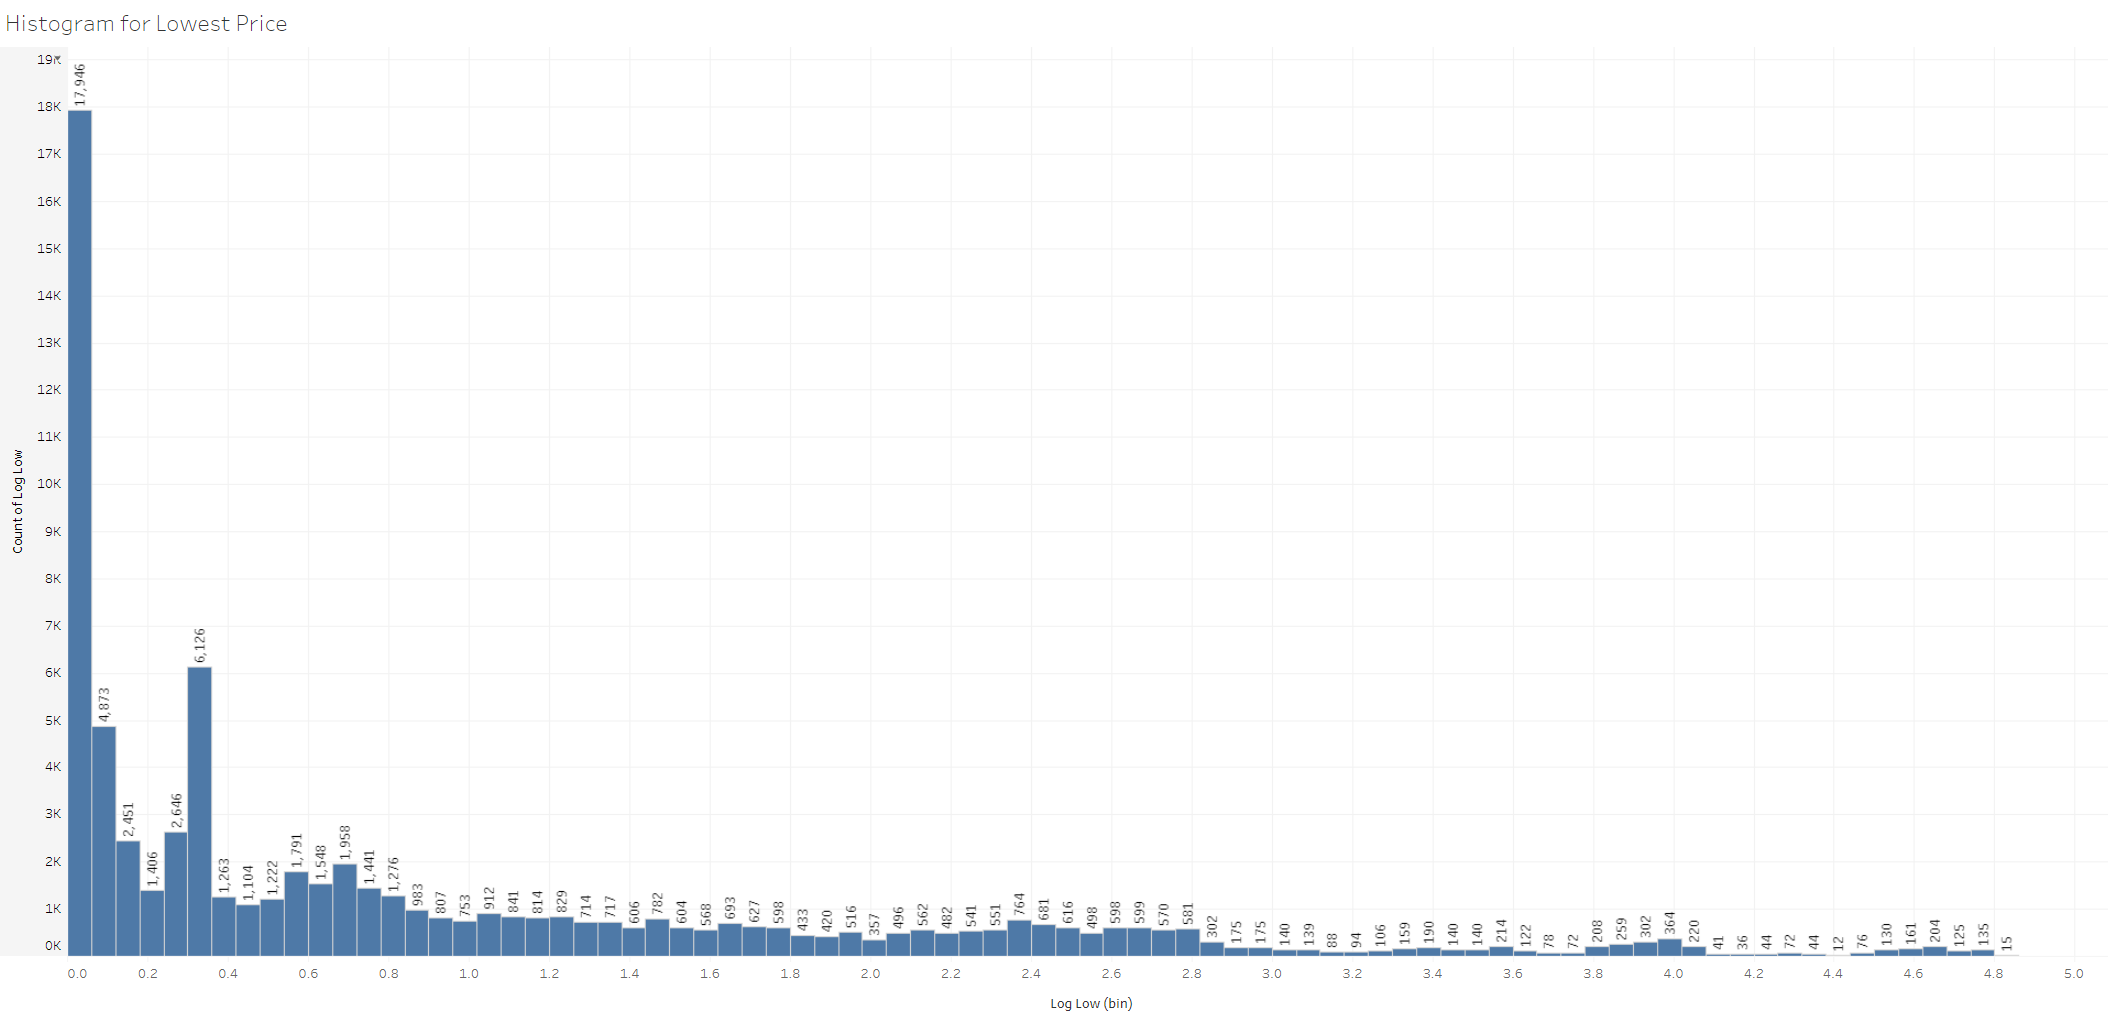

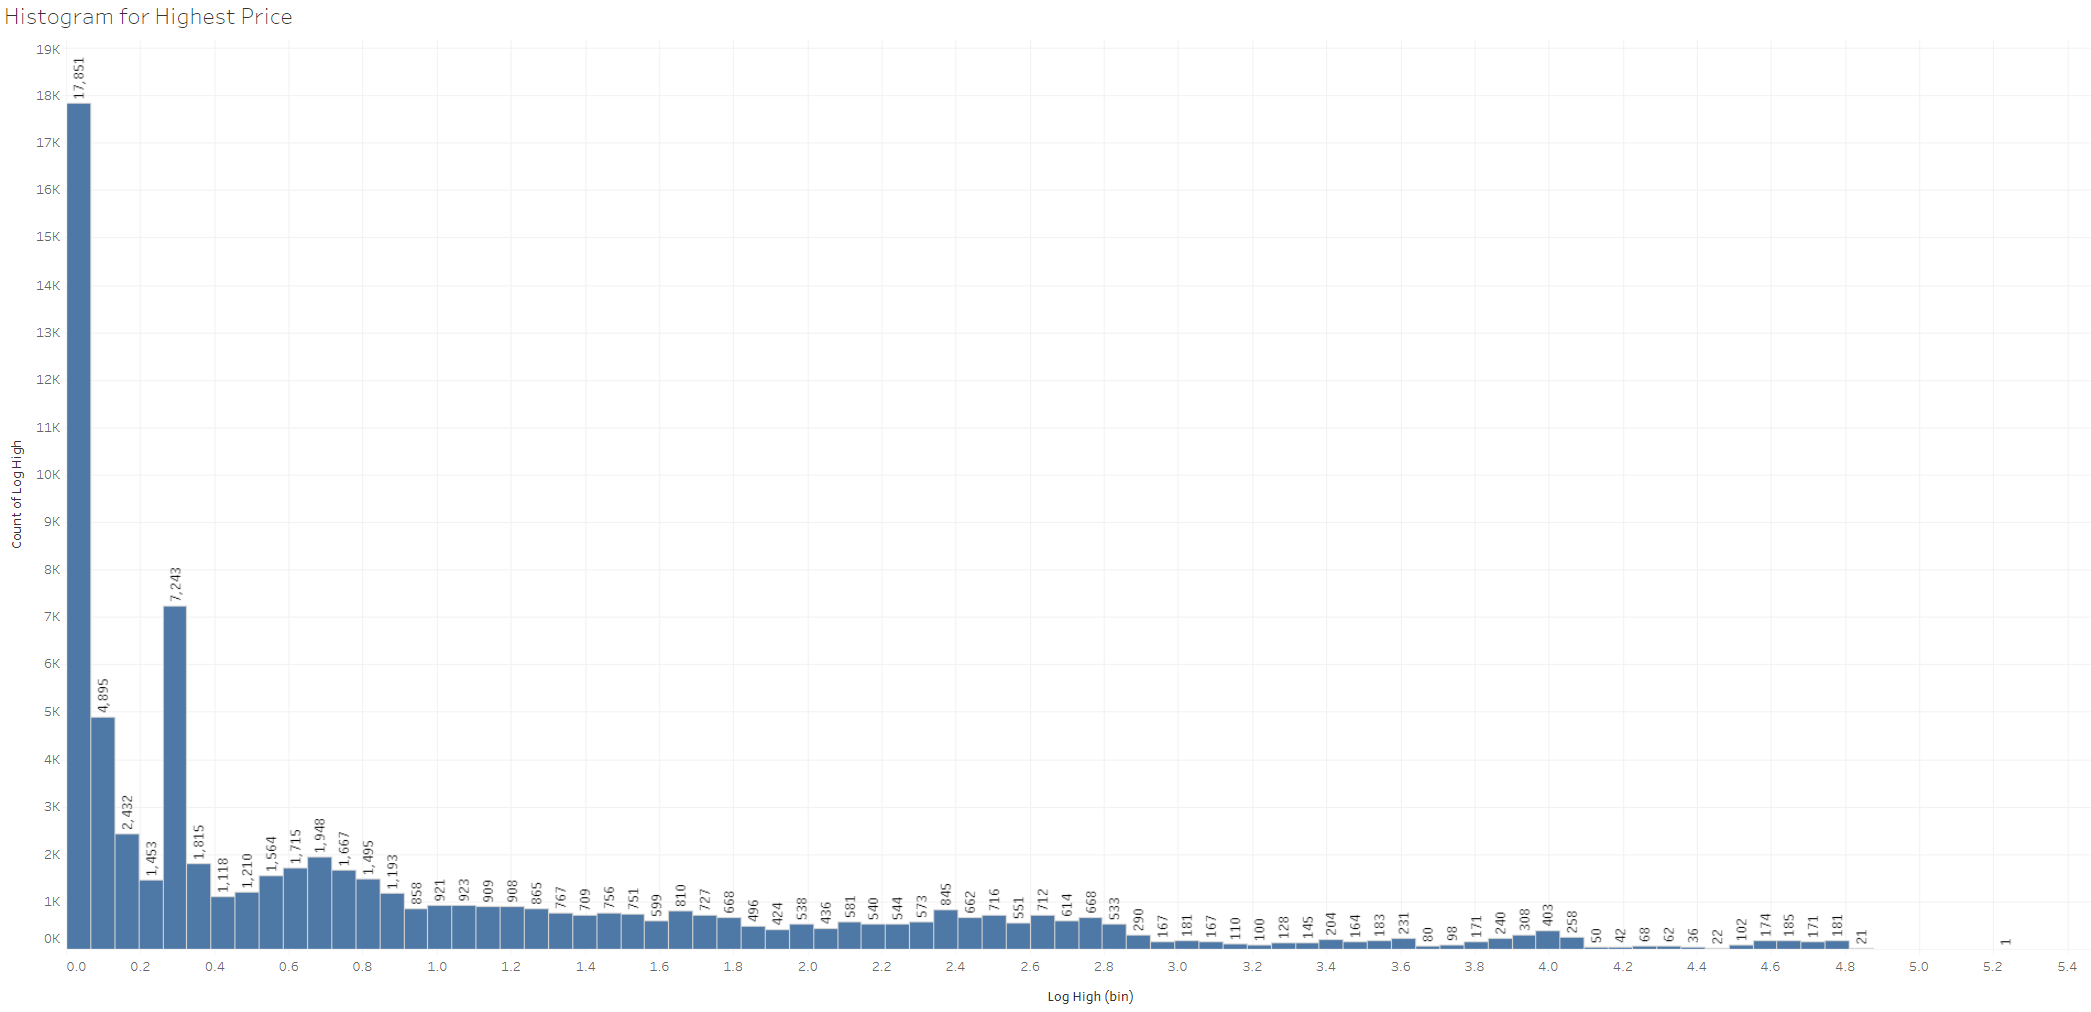

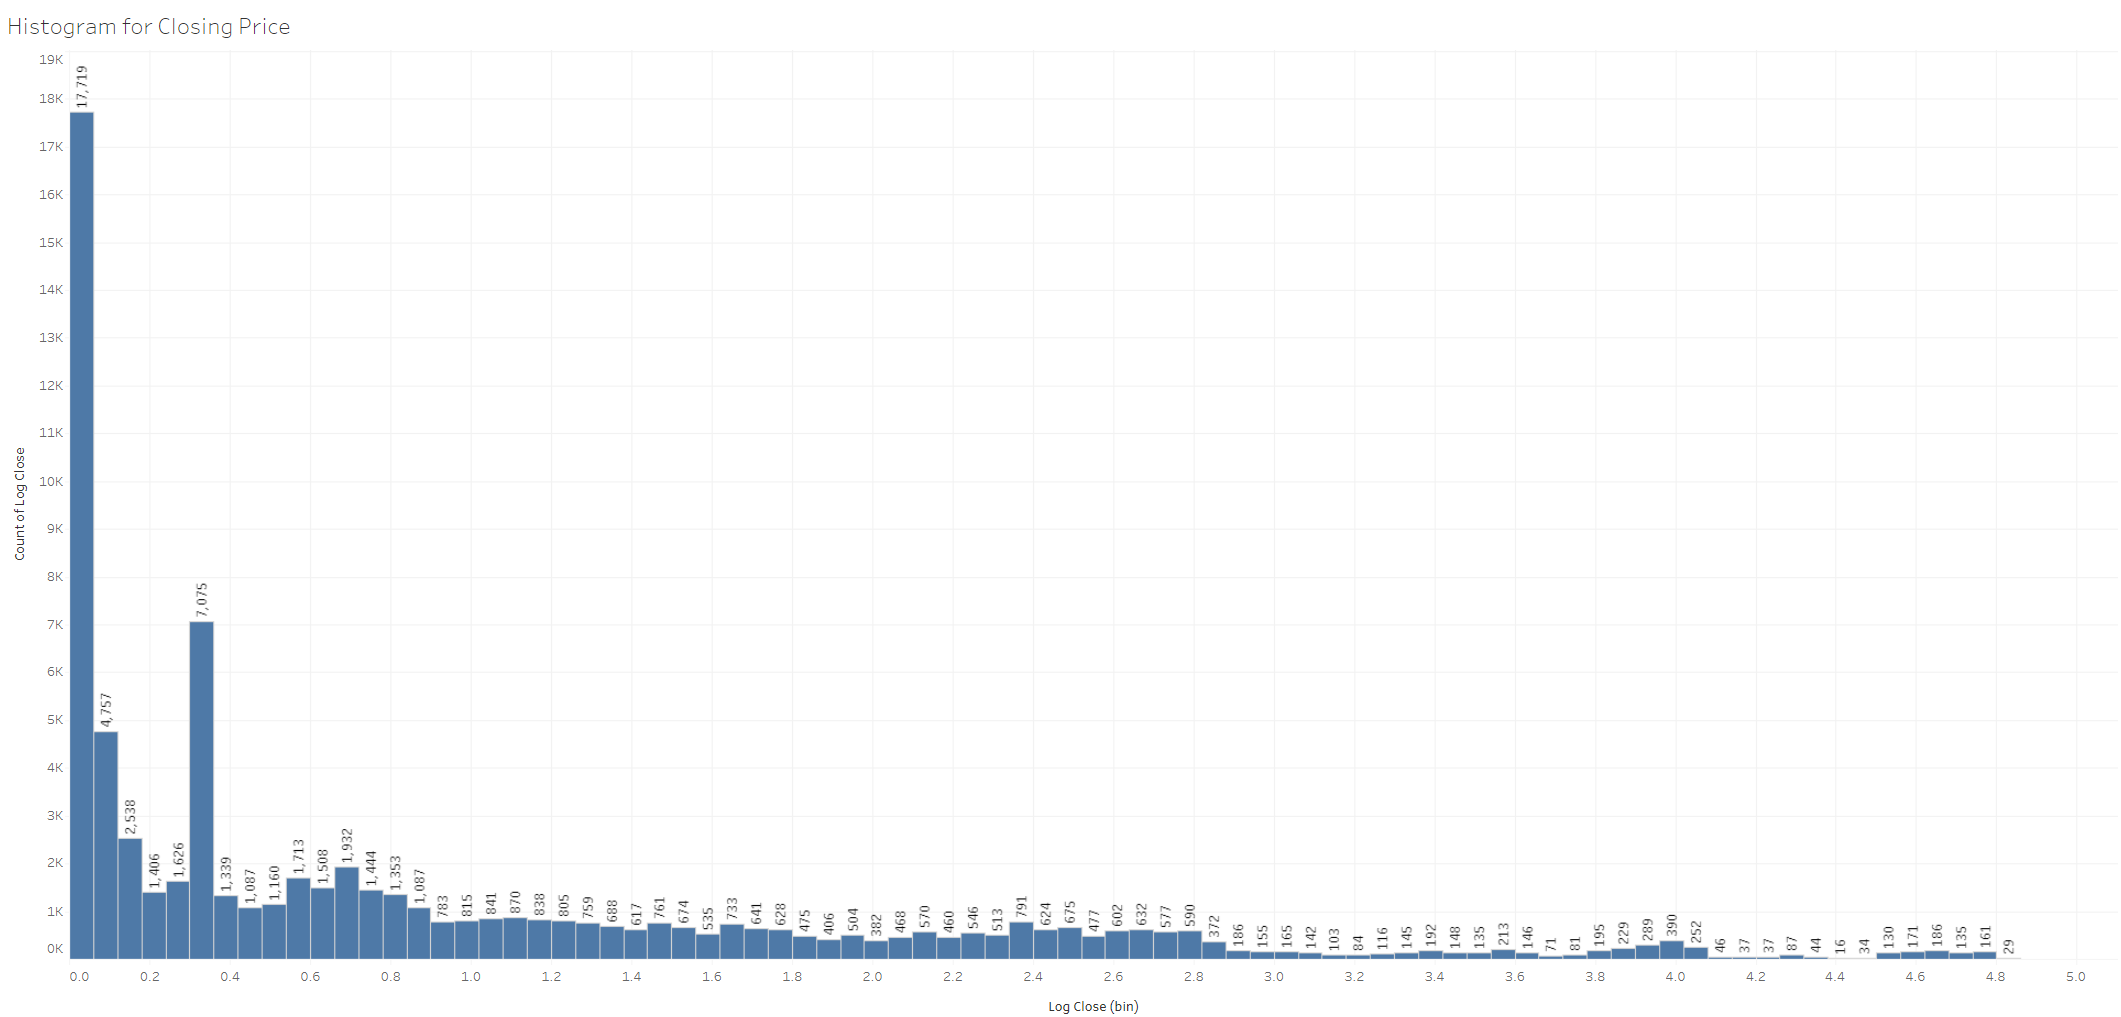

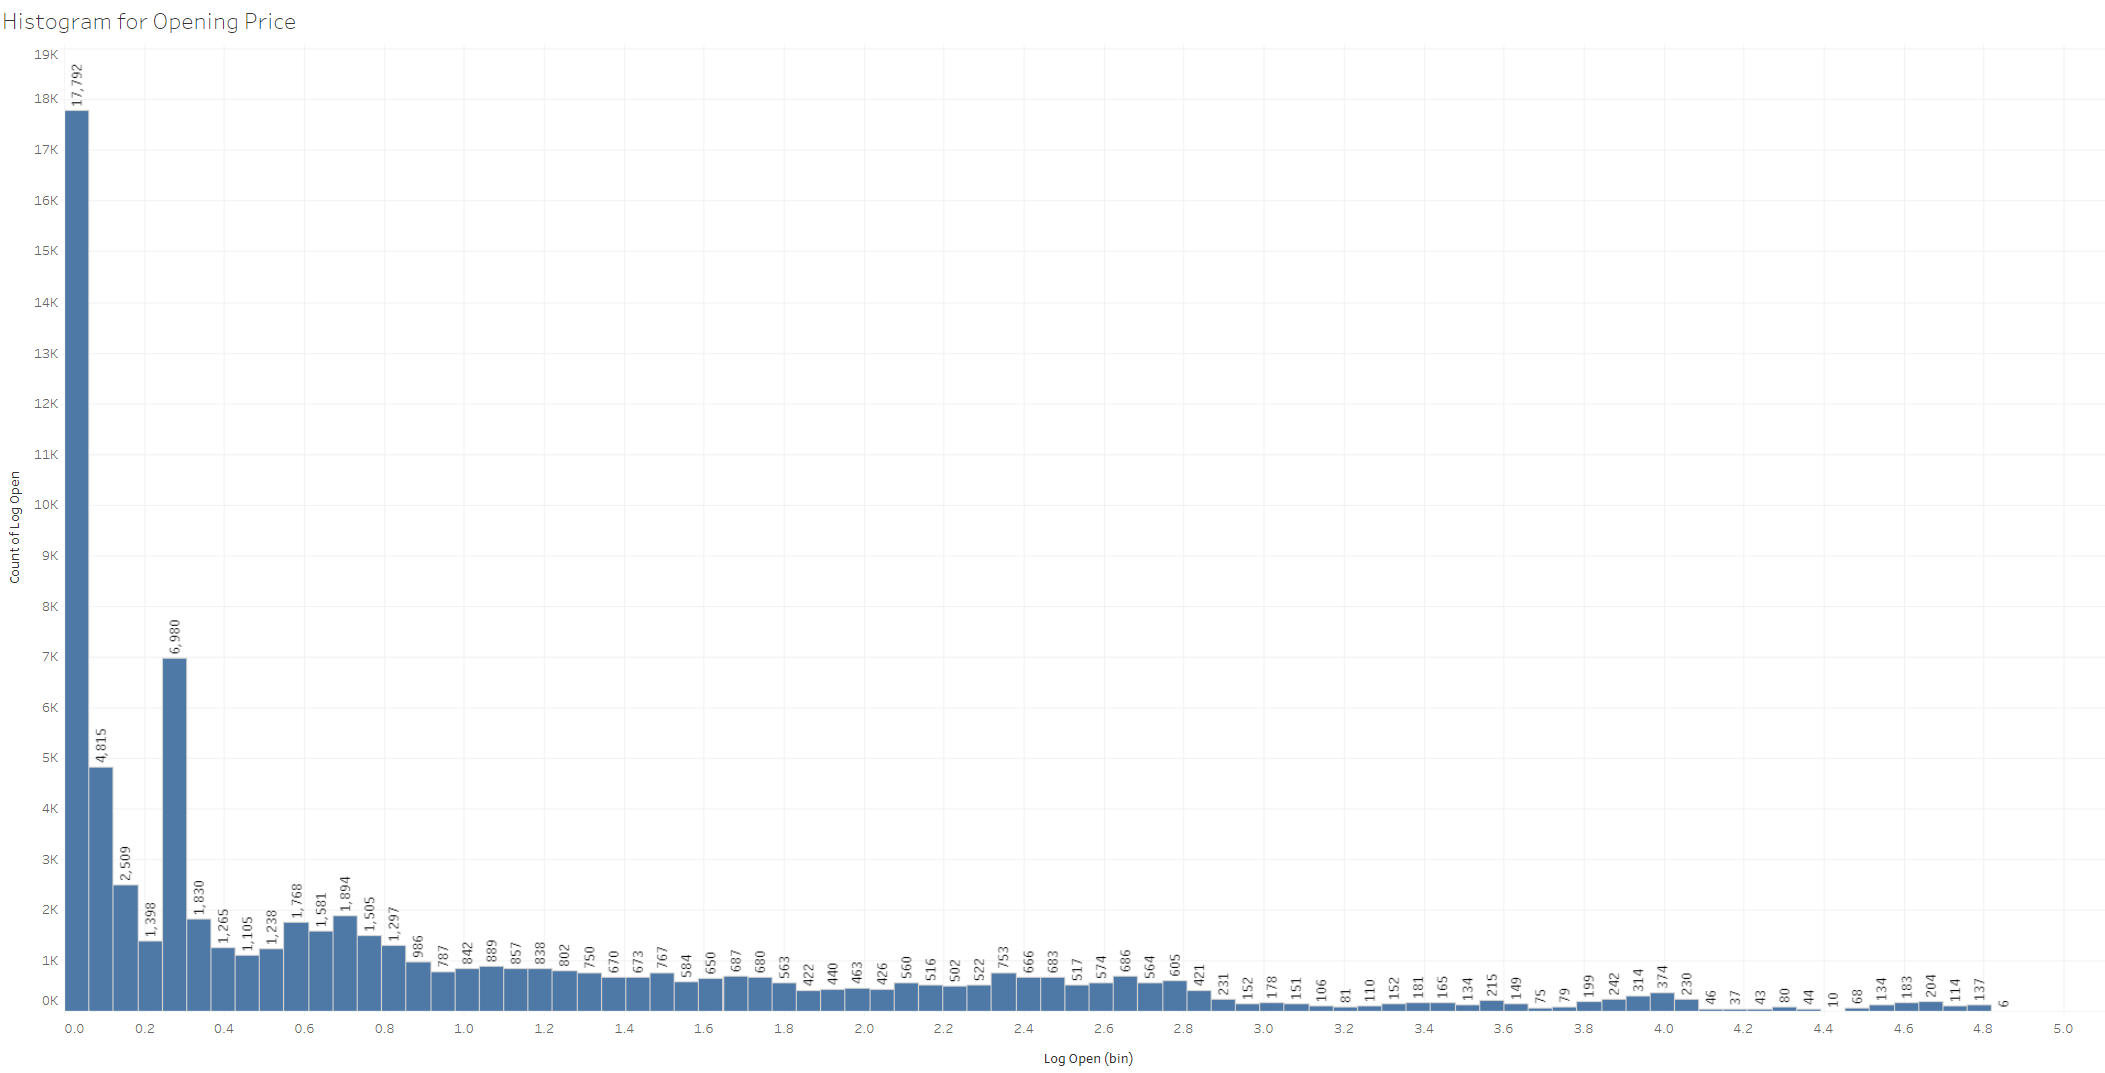

#### Before and After Transformation Visuals

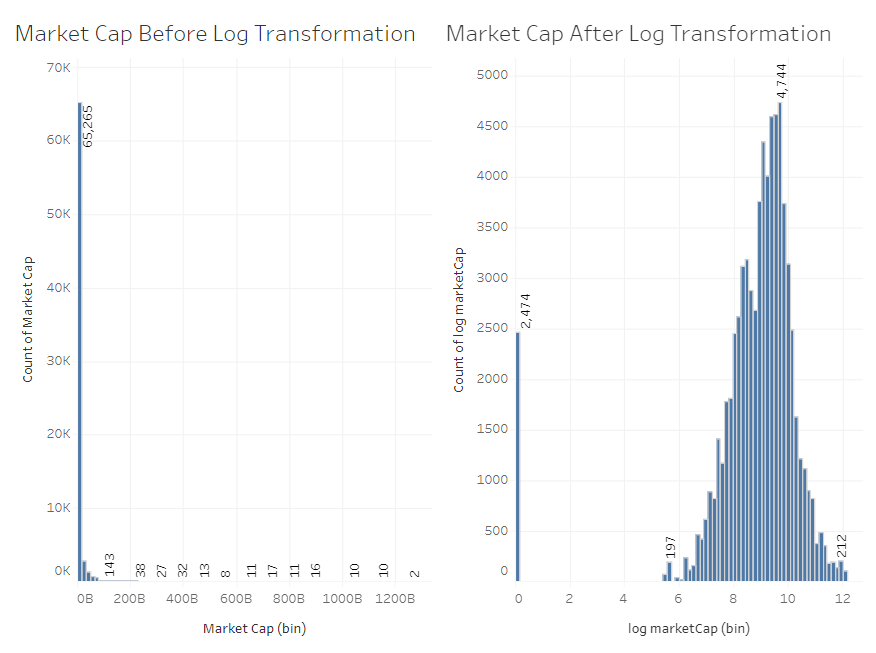

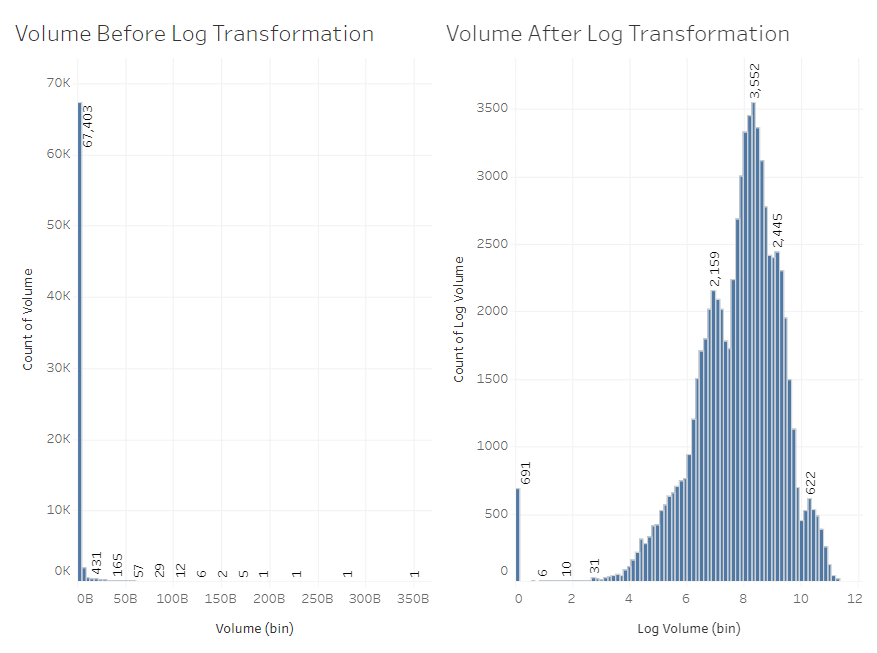

### Bi-Variate Analysis

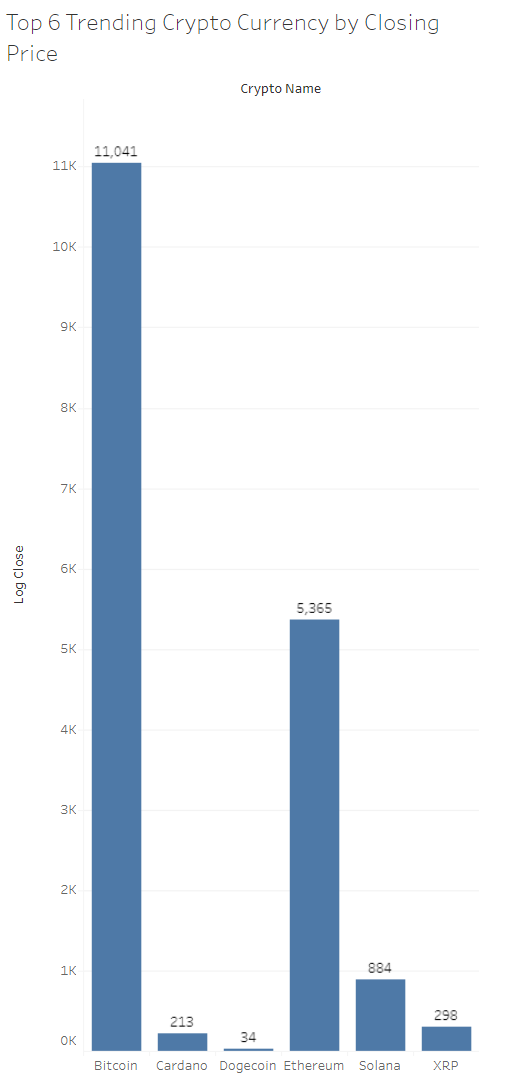

### Multi-Variate Analysis

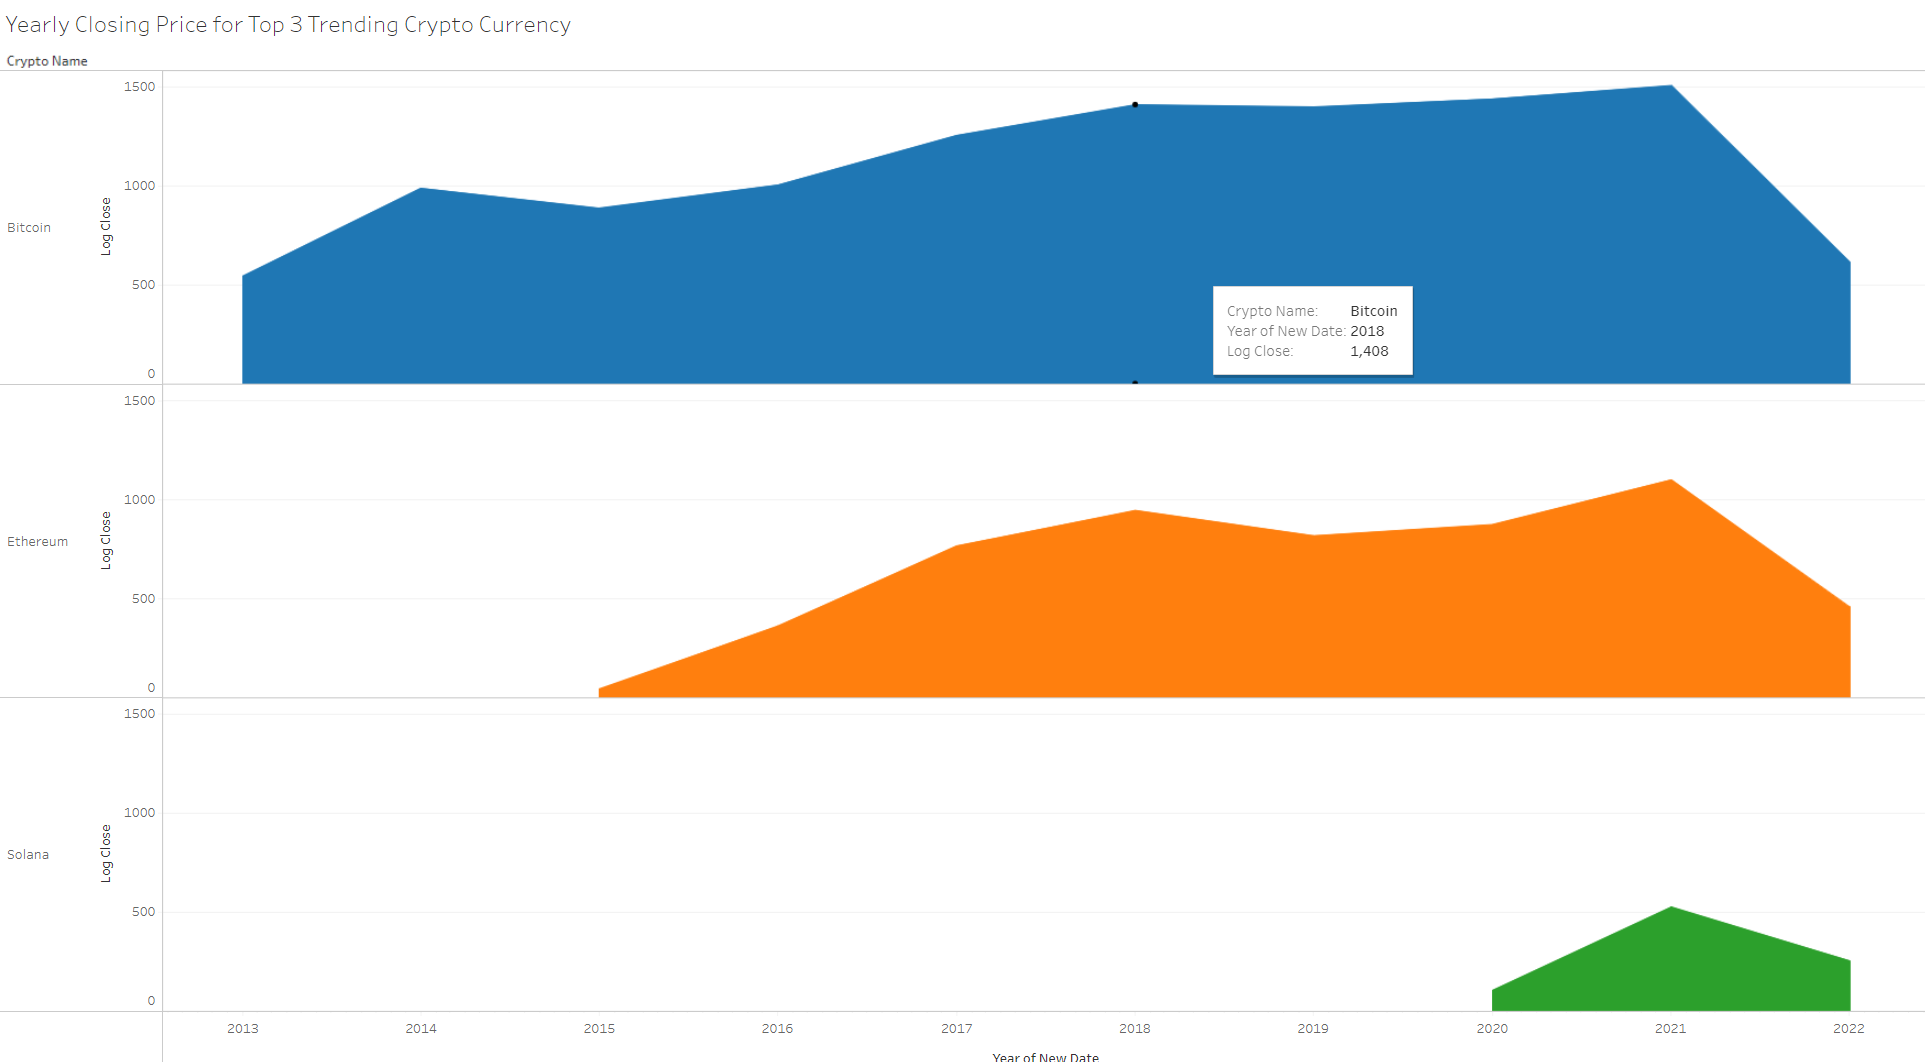

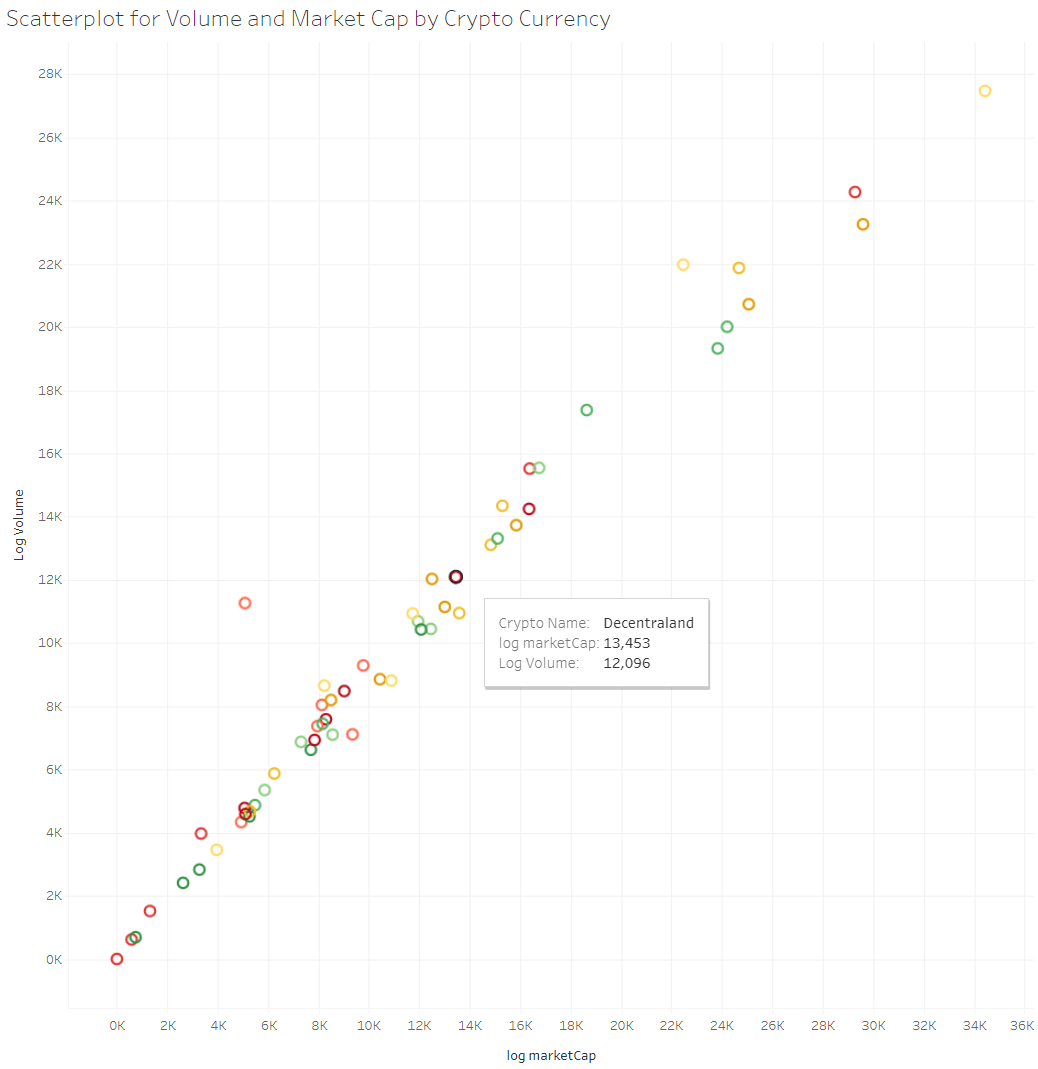

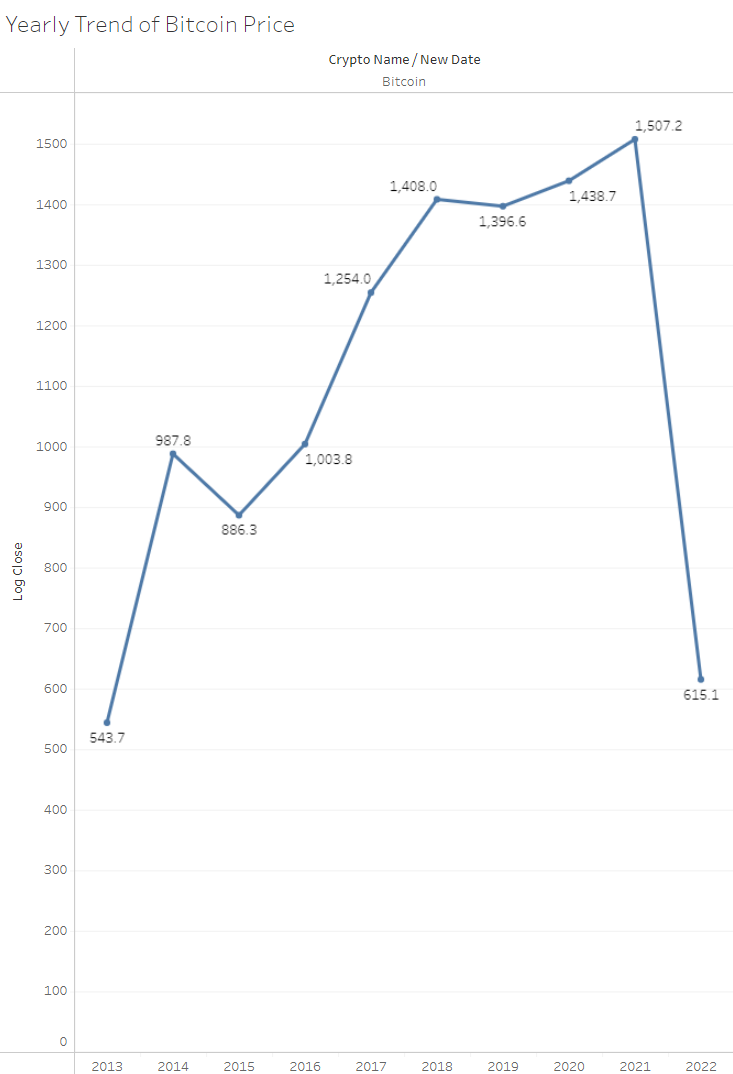

## Data Modeling

In [33]:
required_features = ['log_open', 'log_high', 'log_low', 'log_volume']
output_label = 'log_close'

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(new_df[required_features],new_df[output_label],test_size = 0.3)

In [35]:
x_train

,log_open,log_high,log_low,log_volume
926,2.5203,2.5306,2.5193,7.7076
2535,3.8355,3.8407,3.8218,10.5090
3064,4.7851,4.8078,4.7830,10.5769
569,2.5774,2.5974,2.5749,7.4056
2702,4.0243,4.0253,4.0217,10.6499
...,...,...,...,...
56,1.9823,1.9962,1.9787,0.0000
2538,3.8508,3.8616,3.8507,10.5112
1010,2.5734,2.5778,2.5728,7.7429
1338,2.9998,3.0138,2.9990,8.3467


In [36]:
x_test

,log_open,log_high,log_low,log_volume
2345,3.9112,3.9118,3.9009,10.1193
674,2.4637,2.4786,2.4635,7.8310
2263,4.0373,4.0413,3.9754,10.3829
2500,3.8982,3.9005,3.8833,10.5875
303,2.8256,2.8434,2.8174,7.7431
...,...,...,...,...
1463,3.1988,3.2035,3.1933,9.0334
1675,4.0677,4.0804,4.0647,9.8386
2192,3.7629,3.7637,3.7524,10.1969
252,2.9641,2.9683,2.9305,7.5980


In [37]:
y_train

926    2.5265
2535   3.8224
3064   4.8009
569    2.5756
2702   4.0233
        ...  
56     1.9895
2538   3.8609
1010   2.5764
1338   3.0098
1378   3.0024
Name: log_close, Length: 2273, dtype: float64

In [38]:
y_test

2345   3.9025
674    2.4665
2263   3.9767
2500   3.8983
303    2.8246
        ...  
1463   3.2035
1675   4.0762
2192   3.7595
252    2.9366
2815   4.5355
Name: log_close, Length: 975, dtype: float64

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
model.score(x_test, y_test)

0.9999273528194839

In [41]:
future_set = new_df.shift(periods=0).tail(50)

In [ ]:
future_set

In [42]:
prediction = model.predict(future_set[required_features])

In [43]:
prediction

array([4.50491391, 4.47482855, 4.48719456, 4.48202361, 4.47918022,
       4.47142846, 4.46878496, 4.46653294, 4.49755859, 4.50299101,
       4.47524351, 4.49676681, 4.47766363, 4.43707122, 4.33941184,
       4.29499164, 4.30623372, 4.32872986, 4.33018233, 4.32441445,
       4.31660797, 4.28555078, 4.29946964, 4.32178615, 4.30533732,
       4.3269369 , 4.34887832, 4.35723229, 4.3378384 , 4.37598116,
       4.36389865, 4.36600526, 4.3806204 , 4.3929439 , 4.39190172,
       4.33300472, 4.32434204, 4.29690014, 4.30559075, 4.29700331,
       4.29631236, 4.33332148, 4.34627257, 4.29225144, 4.27593569,
       4.27684598, 4.28115147, 4.28897263, 4.28594554, 4.29001862])

Text(0, 0.5, '$ Price')

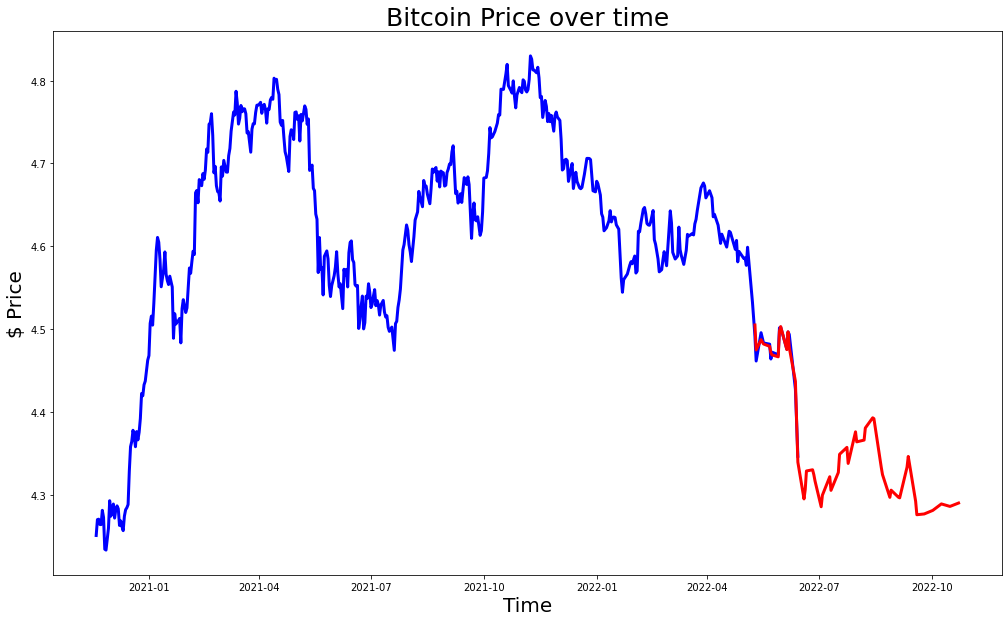

In [44]:
plt.figure(figsize = (17, 10))
plt.plot(new_df["new_date"][-500:-35], new_df['log_close'][-500:-35], color='blue', lw=3)
plt.plot(future_set["new_date"], prediction, color='red', lw=3)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
pd.DataFrame(prediction)
prediction